<a href="https://colab.research.google.com/github/Fjallripa/TinyStories/blob/main/Testing_different_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trying out inference on different transformers

In [ ]:
from transformers import GPTNeoForCausalLM, AutoTokenizer, AutoModelForCausalLM
import matplotlib.pyplot as plt
import numpy as np
import torch
import os

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


## Our German models

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("dbmdz/german-gpt2")

prompt = "Es war einmal"
input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)
attention_mask = torch.ones(input_ids.shape, device=device)

config.json:   0%|          | 0.00/865 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.43M [00:00<?, ?B/s]

### model-1m-de-2024-03-22T20:26

In [ ]:
model_directory = "/content/drive/My Drive/genAI project/model-1m-de-2024-03-22T20:26:55.933894"
model = GPTNeoForCausalLM.from_pretrained(model_directory).to(device)


output = model.generate(input_ids, max_length = 200, num_beams=2, temperature=0,
                        attention_mask=attention_mask, pad_token_id = 50256,
                        repetition_penalty=3.0, #do_sample=True,
                        )
output_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(output_text)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Es war einmal ein kleiner Junge namens Timmy. Timmy liebte es, mit seinen Freunden zu spielen. Eines Tages ging Timmys Mutter in den Park und sagte: "Ich will nicht aufräumen." Timmy fragte ihn, ob er einen großen Baum besteigen könnte. Timmy dachte, was falsch sei. Timmy wollte auch helfen, aber er konnte nicht finden. Timmy fühlte sich traurig, weil er keine Angst hatte. Er wusste nicht, dass seine Mutter Recht hatte, dass er die Hilfe brauchte. Seine Mutter sagte ihm, sie solle vorsichtig sein, wenn man das Essen essen würde. Timmy lernte, dass manchmal wichtig ist, um Dinge zu kümmern.
 Einmal war da ein kleines Mädchen namens Lily. Sie liebte es, mit ihren Spielzeugen zu spielen. Eines Tages fand Lilys Mami ihr eine große Schachtel Spielzeugauto. Es war sehr hübsch aus dem Boden. Lily sah so glücklich und bat ihre Mami, wie der Laden zu reinigen. Ihre Mami sagte: „


In [ ]:
output = model.generate(input_ids, max_length = 1000, num_beams=2, temperature=0,
                        attention_mask=attention_mask, pad_token_id = 50256,
                        repetition_penalty=3.0, length_penalty=1000.0, #do_sample=True,
                        )
output_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(output_text)

OverflowError: (34, 'Numerical result out of range')

In [ ]:
output = model.generate(input_ids, max_length = 200, num_beams=2, temperature=0,
                        attention_mask=attention_mask, pad_token_id = 50256,
                        #repetition_penalty=0.0, #do_sample=True,
                        )
output_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(output_text)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Es war einmal ein kleiner Junge namens Timmy. Timmy liebte es, mit seinen Freunden zu spielen. Eines Tages ging Timmy in den Park, um mit seinen Freunden zu spielen. Timmy war sehr glücklich, weil er nicht mehr zu spielen wollte. Timmys Mutter sagte: "Es ist okay, Timmy. Ich bin froh, dass du mir helfen kann." Timmys Mutter sagte: "Ja, Timmy. Ich bin froh, dass du mir helfen kann." Timmy sagte: "Ja, Timmy. Ich bin froh, dass du mir helfen kann." Timmy sagte: "Ich bin froh, Timmy. Ich bin froh, dass du mir helfen kann." Timmy war glücklich und sagte: "Danke, Timmy. Ich bin froh, dass du mir geholfen hast."
 Einmal war da ein kleiner Junge namens Timmy. Timmy liebte es, mit seinen Freunden zu spielen. Eines Tages ging Timmy mit seiner Mutter in den Park. Timmy liebte es


In [ ]:
loss_directory = "/content/drive/My Drive/genAI project/losses_tensor-1m-de-2024-03-22T20:26:55.933894.pt"
losses = torch.load(loss_directory)
fig, ax = plt.subplots()
ax.set_title("Loss reduction during training")
ax.set_ylabel("Loss")
ax.set_xlabel("batches processed")
ax.plot(np.array(losses).flatten())
fig.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/genAI project/losses_tensor-1m-de-2024-03-22T20:26:55.933894.pt'

### model-1m-de-2024-03-22T13:58

In [ ]:
model_directory = "/content/drive/My Drive/genAI project/model-1m-de-2024-03-22T13:58:01.517911"
model = GPTNeoForCausalLM.from_pretrained(model_directory).to(device)


output = model.generate(input_ids, max_length = 1024, num_beams=5, #temperature=0,
                        attention_mask=attention_mask, pad_token_id = 50256, eos_token_id = 50256,
                        do_sample=True)
output_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(output_text)

Es war einmal ein kleines Mädchen namens Lily. Sie liebte es, mit ihrer Mutter, dass sie sich, die sie hatte. Sie liebte es zu spielen. Eines Tages ging sie eine große Umarmte. Lily. Ihre Mami und sagte: "Nein, ich will es ist nicht getan!" Lily.
 Einmal war einmal ein kleines Mädchen namens Lily. Sie liebte es. Sie liebte es, sie ein kleines Mädchen namens Lily. Sie liebte es, Lily. Sie liebte es zu spielen. Sie liebte es zu spielen. Sie liebte es, dass es zu spielen. Sie liebte es zu spielen. Sie liebte es zu spielen. Sie liebte es zu spielen. Sie liebte es, dass sie zu spielen. Lily. Lily war sehr glücklich und sagte: "Es ist okay, aber es nicht zu spielen." Lily namens Lily. Lily namens Lily war einmal ein kleines Mädchen namens Lily. Sie liebte es, Lily. Sie liebte es zu spielen. Sie liebte es nicht zu spielen. Sie sah Lily namens Lily. Sie liebte es zu spielen. Lily. Sie liebte es, mit ihrer Mutter zu spielen. Sie liebte es zu spielen. Sie liebte es zu spielen. Sie sah Lily war g

In [ ]:
output = model.generate(input_ids, max_length = 1024, num_beams=2, temperature=0,
                        attention_mask=attention_mask, pad_token_id = 50256,
                        repetition_penalty=3.0, #do_sample=True,
                        )
output_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(output_text)

Es war einmal ein kleines Mädchen namens Lily. Sie liebte es, mit ihren Freunden zu spielen. Eines Tages ging sie einen großen Baum und sagte: "Ich bin nicht getan!" Ihre Mutter in den ganzen Tag an diesem Tag im Park.
 Einmal war da ein kleiner Junge namens Timmys Mami antwortete: „Ja, ich werde dir helfen." Timmy. Er wollte ihn auf dem Boden. Timmy fühlte sich umarmte er eine große Umarmung. Timmy lächelte und fragte seine Freunde waren sehr glücklich, aber dann kam Lilys Mutter zum Spielen. Timmy hatte Angst vor Freude. Timmy wusste, dass der Nähe des Hügels! Ich habe keine Sorgen, was falsch sei Zeit für das kleine Katze namens TM sweet säubern", sagte: „Was ist okay, die Sonne unter einem kleinen Jungen namens Timmy. Du bist du mir leid, wenn wir können uns etwas Besonderes machen?" Seine Mutter ihr Spielzeugauto wegzulaufen. Als sie ihre Mutter gab sein Freundlichkeit. Von diesem Tag spielte gerne draußen gehen. Aber dann sah Max dachte darüber nach Hause kamen, weil er seinen Ko

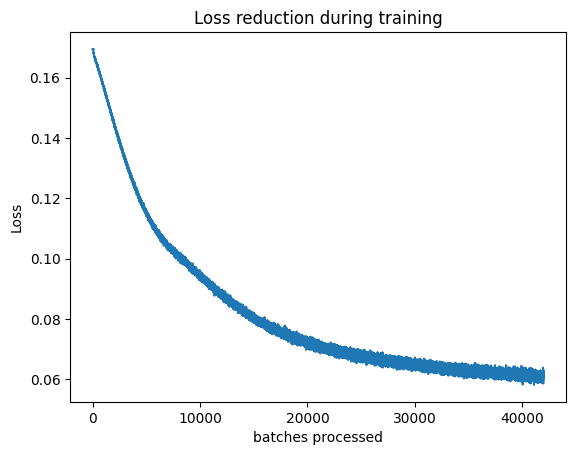

In [ ]:
loss_directory = "/content/drive/My Drive/genAI project/losses_tensor-1m-de-2024-03-22T13:58:01.587117.pt"
losses = torch.load(loss_directory)
fig, ax = plt.subplots()
ax.set_title("Loss reduction during training")
ax.set_ylabel("Loss")
ax.set_xlabel("batches processed")
ax.plot(np.array(losses).flatten())
fig.show()

### model-1m-de-2024-03-22T10:42

In [ ]:
model_directory = "/content/drive/My Drive/genAI project/model-1m-de-2024-03-22T10:42:27.931481"
model = GPTNeoForCausalLM.from_pretrained(model_directory).to(device)

output = model.generate(input_ids, max_length = 1024,
                        num_beams=5, temperature=0)
output_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(output_text)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Es war einmal. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war.. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war. Sie war

### model-1m-de-2024-03-22T07:00

In [ ]:
model_directory = "/content/drive/My Drive/genAI project/model-1m-de-2024-03-22T07:00:39.130247"
model = GPTNeoForCausalLM.from_pretrained(model_directory).to(device)

output = model.generate(input_ids, max_length = 1024,
                        num_beams=5, temperature=0)
output_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(output_text)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Es war einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal

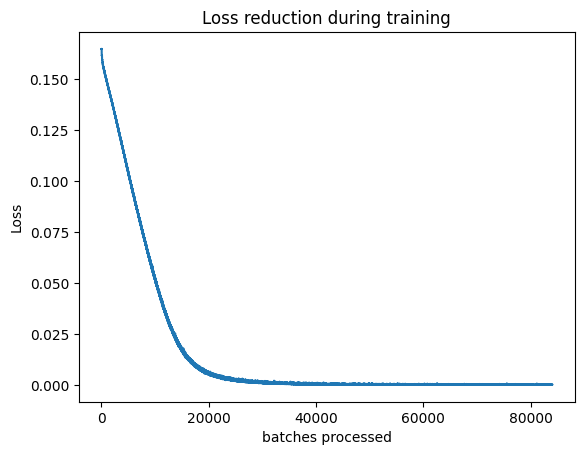

In [ ]:
loss_directory = "/content/drive/My Drive/genAI project/losses_tensor-1m-de-2024-03-22T07:00:39.220950.pt"
losses = torch.load(loss_directory)
fig, ax = plt.subplots()
ax.set_title("Loss reduction during training")
ax.set_ylabel("Loss")
ax.set_xlabel("batches processed")
ax.plot(np.array(losses).flatten())
fig.show()

### model-1m-de-2024-03-21T17:23

In [ ]:
model_directory = "/content/drive/My Drive/genAI project/model-1m-de-2024-03-21T17:23:38.656549"
model = GPTNeoForCausalLM.from_pretrained(model_directory).to(device)

output = model.generate(input_ids, max_length = 1024,
                        num_beams=5, temperature=0)
output_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(output_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Es war einmal Arzt Arzt Arzt Arzt Arzt Arzt sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein sein s

### model-1m-de-2024-03-21T17:03

In [ ]:
model_directory = "/content/drive/My Drive/genAI project/model-1m-de-2024-03-21T17:03:09.743730"
model = GPTNeoForCausalLM.from_pretrained(model_directory).to(device)

output = model.generate(input_ids, max_length = 1024,
                        num_beams=1, temperature=1)
output_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(output_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Es war einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal einmal

## Our English recreation models

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neo-125M")

prompt = "Once upon a time there was"
input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)

tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/357 [00:00<?, ?B/s]

### model-2024-03-09

In [ ]:
model_directory = "/content/drive/My Drive/genAI project/model-2024-03-09T00:44:46.832115"

if os.path.exists(model_directory):
    model = GPTNeoForCausalLM.from_pretrained(model_directory).to(device)
    print("model loaded.")
else:
    print("Model not loaded!")

NameError: name 'os' is not defined

In [ ]:
#model.num_parameters()   #-> 3.7M

3745984

In [ ]:
output = model.generate(input_ids, max_length = 1024,
                        num_beams=5, temperature=0)
output_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(output_text)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time there was a little boy named Timmy. Timmy loved to play outside in the park. One day, Timmy's mom told him to go to the park. Timmy didn't want to play with his mom.

Timmy's mom said yes, but Timmy didn't want to play. Timmy didn't want to play with his mom. Timmy was sad and didn't want to play with his mom.

Timmy's mom said, "Timmy, Timmy, but Timmy didn't want to play with him. Timmy didn't want to play with Timmy. Timmy didn't want to play with Timmy. Timmy was sad and didn't want to play with Timmy.

Timmy was sad and didn't want to play with Timmy. Timmy was sad and didn't want to play with Timmy. Timmy didn't want to play with Timmy. Timmy was sad and didn't want to play with Timmy. Timmy didn't want to play with Timmy.

Timmy was sad and didn't want to play with Timmy. Timmy didn't want to play with Timmy, but he didn't want to play with Timmy. Timmy didn't want to play with Timmy, but he didn't want to play with Timmy. Timmy didn't want to play with Timmy, b

### model-2024-03-11

In [ ]:
model_directory = "/content/drive/My Drive/genAI project/model-2024-03-11"

if os.path.exists(model_directory):
    model = GPTNeoForCausalLM.from_pretrained(model_directory).to(device)
    print("model loaded.")
else:
    print("Model not loaded!")

model loaded.


In [ ]:
output = model.generate(input_ids, max_length = 1024,
                        num_beams=5, temperature=0)
output_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(output_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time there was a little boy named Timmy. Timmy loved to play outside in the park. One day, Timmy's mom told him to go to the park. Timmy didn't want to play with his mom.

Timmy's mom said yes, but Timmy didn't want to play. Timmy didn't want to play with his mom. Timmy was sad and didn't want to play with his mom.

Timmy's mom said, "Timmy, Timmy, but Timmy didn't want to play with him. Timmy didn't want to play with Timmy. Timmy didn't want to play with Timmy. Timmy was sad and didn't want to play with Timmy.

Timmy was sad and didn't want to play with Timmy. Timmy was sad and didn't want to play with Timmy. Timmy didn't want to play with Timmy. Timmy was sad and didn't want to play with Timmy. Timmy didn't want to play with Timmy.

Timmy was sad and didn't want to play with Timmy. Timmy didn't want to play with Timmy, but he didn't want to play with Timmy. Timmy didn't want to play with Timmy, but he didn't want to play with Timmy. Timmy didn't want to play with Timmy, b

## TinyStories models

### 33M

In [ ]:
model = AutoModelForCausalLM.from_pretrained('roneneldan/TinyStories-33M')

In [ ]:
output = model.generate(input_ids, max_length = 1000, num_beams=1)
output_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(output_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time there was a little girl named Lucy. She was three years old and loved to explore. One day, Lucy was walking in the park when she saw a big, red balloon. She was so excited and ran over to it.

"Can I have it?" she asked.

"No," said her mom. "It's too big for you. You can't have it."

Lucy was sad, but then she saw a small, red balloon. She smiled and said, "I want that one!"

Her mom smiled and said, "Okay, let's go get it."

So they went to the balloon and Lucy was so happy. She held the balloon tight and ran around the park with it. She laughed and smiled and had so much fun.

When it was time to go home, Lucy hugged the balloon and said, "I love you, balloon!"

Her mom smiled and said, "I love you too, Lucy."



#### test with `num_beams=5, temperature=0`

In [ ]:
output = model.generate(input_ids, max_length = 1000, num_beams=5, temperature=0)
output_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(output_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time there was a little girl named Lucy. She was three years old and loved to explore the world around her.

One day, Lucy decided to go for a walk in the park. As she was walking, she saw something shiny in the grass. She bent down to take a closer look and saw that it was a penny!

Lucy was so excited that she picked it up and put it in her pocket. Suddenly, she heard a voice behind her.

"What do you have there, Lucy?" asked the voice.

Lucy turned around and saw an old man. She smiled and said, "I found a penny in the grass!"

The old man smiled and said, "That's great! You should keep it safe."

Lucy thanked the old man and put the penny in her pocket. She then continued her walk in the park, feeling very happy.



### 1M

In [ ]:
model = AutoModelForCausalLM.from_pretrained('roneneldan/TinyStories-1M')

In [ ]:
output = model.generate(input_ids, max_length = 1000, num_beams=5, temperature=0)
output_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(output_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time there was a little boy named Timmy. Timmy loved to play outside and explore the world around him. One day, Timmy went to the park with his mommy and daddy. Timmy was so excited to explore the park.

When they got to the park, Timmy's mommy said they were going to the park. Timmy was so excited to go and play on the swings. But when they got to the park, Timmy's mommy said it was time to go home. Timmy was sad because he didn't want to go to the park again.

After a while, Timmy's mommy said it was time to go home. Timmy was sad because he didn't want to go back to the park again. But his mommy said it was time to go home. Timmy was sad, but he knew he had to go to the park again tomorrow.



### 3M

In [ ]:
model = AutoModelForCausalLM.from_pretrained('roneneldan/TinyStories-3M')

config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

In [ ]:
output = model.generate(input_ids, max_length = 1000, num_beams=5, temperature=0)
output_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(output_text)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time there was a little boy named Timmy. Timmy loved to play with his toys all day long. One day, Timmy's mom asked him to clean up his toys. Timmy didn't want to clean up, but he knew he had to listen to his mom.

As Timmy was cleaning up his toys, he accidentally knocked over a vase. The vase fell on the floor and broke into many pieces. Timmy was sad because he couldn't play with his toys anymore.

Timmy's mom came into the room and saw the broken vase. She asked Timmy what happened and Timmy told her about the broken vase. His mom hugged him and said, "It's okay, Timmy. Accidents happen. Let's clean up the mess together."

Timmy learned that it's important to listen to his mom and to clean up after himself. He also learned that it's important to listen to his mom and clean up after himself.

